<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Project: Analysis of vacancies from HeadHunter
   

In [1]:
# import all necessary libraries
import pandas as pd
import psycopg2
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib_venn import venn3,venn2, venn3_circles
import numpy as np

In [3]:
# start the connection to the sql database
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Unit 3. Preliminary data analysis

1. Write a query that will count the number of vacancies in our database (vacancies are in the *vacancies* table). 

In [4]:
# write the query
query_3_1 = f'''select 
                    -- count number of vacancies id and specify column new name
                    count(v.id) "number of vacancies" 
                    
                -- specify the name of the table and indicate its short name
                from public.vacancies v 
'''

In [5]:
# run the query and print the results
df = pd.read_sql_query(query_3_1, connection)
df


,number of vacancies
0,49197


2. Write a query that will count number of employers (*employers* table). 

In [6]:
# write the query
query_3_2 = f'''select 
                    count(e.id) "number of employers"
                from public.employers e
'''

In [7]:
# run the query and print the results
df = pd.read_sql_query(query_3_2, connection)
df

,number of employers
0,23501


3. Count number of areas using query (table *areas*).

In [8]:
# write the query
query_3_3 = f'''select
                    count(a.id) "number of areas"
                from public.areas a
'''

In [9]:
# run the query and print the results
df = pd.read_sql_query(query_3_3, connection)
df

,number of areas
0,1362


4.Calculate number of areas of activity in the database using query (*industries* table).

In [10]:
query_3_4 = f'''select
                    count(i.id) "number of industries"
                from public.industries i
'''

In [11]:
df = pd.read_sql_query(query_3_4, connection)
df

,number of industries
0,294


***

1. There are:
    1. 49197 number of vacancies
    2. 23501 number of employers
    3. 1362 number of vacancies and employers areas
    4. 294 number of areas of employer activity
1. All id's doesn't have any duplicates as the same results with *distinct* function were received.
2. It seems that a lot of employers have more than one vacancy because the number of vacancies is twice as large as the number of employers.


# Unit 4. Detailed analysis of vacancies

1. Write a query which will count number of vacancies (cnt) in each region (area). Sort by a number of vacancies in descending order.

In [12]:
query_4_1 = f'''select
                    a.name,
                    count(v.id) cnt
                -- specify the main table with vacancies   
                from public.vacancies v
                -- join another table with areas to the main table
                left join public.areas a on a.id = v.area_id
                -- group by areas
                group by a.name
                -- sort by a number of vacancies in descending order
                order by 2 desc
'''

In [13]:
df = pd.read_sql_query(query_4_1, connection)
df

,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Write a query to calculate how many vacancies have at least one salary data. 

In [14]:
query_4_2 = f'''select
                    count(*) cnt
                from public.vacancies v
                -- select only rows which contain at least one salary data
                where salary_from is not null
                    or salary_to is not null
'''

In [15]:
df = pd.read_sql_query(query_4_2, connection)
df

,cnt
0,24073


3. Calculate the average of the lowest and highest salary border. Round the values to the nearest integer. 

In [16]:
query_4_3 = f'''select
                    -- calculate average of the lowest salary border & specify new column name
                    round(avg(salary_from)) min_avg,
                    -- calculate average of the highest salary border & specify new column name
                    round(avg(salary_to)) max_avg
                from public.vacancies v
'''

In [17]:
df = pd.read_sql_query(query_4_3, connection)
df

,min_avg,max_avg
0,71065.0,110537.0


4. Write a query which will display counted number of vacancies for each unique pair of schedule & employment type. Sort the results in descending order.


In [18]:
query_4_4 = f'''select
                    schedule,
                    employment,
                    -- count number of unique vacancies
                    count(*) vacancies
                from public.vacancies v
                -- group by unique pair of schedule & employment type
                group by schedule, 
                    employment
                order by 3 desc
'''

In [19]:
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,vacancies
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Write a query that will display the number of vacancy in ascending order per each unique experience type.

In [20]:
query_4_5 = f'''select
                    experience,
                    count(*) vacancies
                from public.vacancies v
                group by experience
                order by 2 
'''

In [21]:
df = pd.read_sql_query(query_4_5, connection)
df

,experience,vacancies
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

1. Moscow, Saint-Petersburg, Minsk, Novosibirsk and Almaty are the cities with the biggest number of vacancies. There are cities which have only 1 vacancy. The larger the city, the more vacancies in it.
2. There are 769 cities with vacancies. But the total number of areas in the db (database) is 1362 so the rest of the cities are either employer's regions of registration or areas which don't connect to any vacancies or employers. 
3. 24073 vacancy have at least one salary data so it seems that half of the vacancies don't have any salary data (as the total number of vacancies = 49197).
4. The average lowest salary border is 71065 RUB and the highest salary border is 110537 RUB.
5. Full employment & full day are the most common vacancy requirements, distant work & full employment are also very popular vacancy requirements. The most unpopular requirements are the combination of project work & rotational method or shift work.
6. Most vacancies- 26152 require 1-3 years of experience, the second most common work experience is 3-6 years is listed in 14511 vacancies. In a third place without any experience has 7197 vacancies and finally 1337 vacancies have more than 6 years of experience in requirements. According to the above statements most employers want to find novice workers with at least 1 year experience and least employers want to find person with many years of experience maybe it's because employers need to pay more for the experience.


# Unit 5. Employer analysis

1. Write a query that will display which employers are in first and fifth place in terms of the number of vacancies.

In [22]:
query_5_1 = f'''select
                    e.name,
                    count(*) vacancies
                from public.vacancies v
                left join public.employers e on e.id = v.employer_id
                group by e.name
                order by 2 desc
                -- select top 5 from the list
                limit 5
'''

In [23]:
df = pd.read_sql_query(query_5_1, connection)
df

,name,vacancies
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Write a query that will calculate number of vacancies & employers per each region. Among the regions in which there are no vacancies, find the one with the largest number of employers.

In [24]:
query_5_2 = f'''select
                    a.name area,
                    count(distinct(e.name)) employers,
                    count(distinct(v.id)) vacancies
                from public.areas a
                left join public.vacancies v on a.id = v.area_id
                left join public.employers e on e.area = a.id
                -- select rows without vacancies
                where 
                    v.id is null
                group by a.name
                -- select  only regions in which there are no vacancies
                having 
                    count(distinct(v.id))=0
                order by 2 desc
'''

In [25]:
df = pd.read_sql_query(query_5_2, connection)
df

,area,employers,vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


In [26]:
# look at the data
df.describe()

,employers,vacancies
count,593.000000,593.0
mean,1.935919,0.0
std,19.172209,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,1.000000,0.0
max,410.000000,0.0


3. For each employer calculate number of regions in which he publishes his vacancies. Sort the result in descending order. 

In [27]:
query_5_3 = f'''select
                    e.name,
                    count(distinct(v.area_id)) region_cnt
                from public.employers e
                left join public.vacancies v on e.id = v.employer_id
                group by e.id,
                    e.name
                order by 2 desc
'''

In [28]:
df = pd.read_sql_query(query_5_3, connection)
df

,name,region_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23496,Но Смокинг,0
23497,МАСТЕРСКАЯ CREED,0
23498,Dzing Finance,0
23499,КОРС,0


4. Write a query that will calculate a number of employers who don't have area of activity.

In [29]:
query_5_4 = f'''select 
                    count(distinct(employers))
                -- create a table with a list of employers without area of activity
                from (
                -- select all employers
                select
                    e.id employers
                from public.employers e
                -- remove employers which have an area of activity
                except
                select
                    distinct(employer_id)
                from public.employers_industries) emp
                '''

In [30]:
df = pd.read_sql_query(query_5_4, connection)
df

,count
0,8419


5. Write a query to find out the name of the company that is in the third place in the alphabetical list of companies that have 4 area of activity.

In [31]:
query_5_5 = f'''select
                    e.name,
                    count(industry_id)
                from public.employers_industries ei
                left join public.employers e on e.id=ei.employer_id
                group by e.id,
                    e.name
                -- select only companies that have 4 area of activity
                having 
                    count(industry_id) = 4
                order by 1
'''

In [32]:
df = pd.read_sql_query(query_5_5, connection)
df

,name,count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
...,...,...
1133,ЮРИОН,4
1134,ЮТИП Технологии,4
1135,ЯКласс,4
1136,ЯрНео,4


6. Find out the number of employers that have *Разработка программного обеспечения* in area of activity using query.

In [33]:
query_5_6 = f'''select
                    count(distinct(ei.employer_id))
                -- bind all 3 tables with employers list, employer&intustries, industries list together
                from public.employers_industries ei
                left join public.industries i on ei.industry_id = i.id
                left join public.employers e on e.id=ei.employer_id
                -- filter by special area
                where
                    i.name='Разработка программного обеспечения' 
'''

In [34]:
df = pd.read_sql_query(query_5_6, connection)
df

,count
0,3553


7. Find out the list of the cities-millionaires where the Yandex company has vacancies with counted number of vacancies. Add the row with the total sum of all Yandex vacancies. Sort the result in ascending order.

List of the cities-millionaires [here](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 


In [35]:
# load the list of cities-millionaires & have a look
table_1 = pd.read_html('https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8')
millioners = table_1[1]
millioners

,№,Город,"Население, тыс. чел. (итоги переписи 2021 года)[5]",Прирост относительно переписи-2010,"Население, тыс. чел.(итоги переписи 2010 года)[6]"
0,1,Москва,13 010,"13,1%",11 504
1,2,Санкт-Петербург,5602,"14,8%",4880
2,3,Новосибирск,1634,"10,9%",1474
3,4,Екатеринбург,1544,"14,4%",1350
4,5,Казань,1309,"14,4%",1144
5,6,Нижний Новгород,1226,NaN,1251
6,7,Челябинск,1190,"5,3%",1130
7,8,Красноярск,1188,"21,6%",977
8,9,Самара,1173,"0,3%",1169
9,10,Уфа,1145,"7,8%",1062


In [36]:
# Change the ending one of the city & make it in needed type
millioners['Город'] = millioners['Город'].str.replace('\\[a\]$','')
cities = tuple(millioners['Город'])

# write a query
query_5_7 = f'''--prepare a cities list with counted number of vacancies
                select
                    a.name,
                    -- count number of vacancies
                    count(*)
                from public.areas a 
                left join public.vacancies v on a.id = v.area_id
                left join public.employers e on e.id=v.employer_id
                --filter only cities-millionaires
                where 
                    a.name in {cities} 
                    and e.name='Яндекс'
                group by a.name,
                    a.id
                -- unite tables
                union
                -- prepare row with total sum of the vacancies
                select
                    'total',
                    count(*)
                from public.areas a 
                left join public.vacancies v on a.id = v.area_id
                left join public.employers e on e.id=v.employer_id
                where 
                    a.name in {cities} 
                    and e.name='Яндекс'
                order by 2
               
                '''.format(cities = cities)

<ipython-input-36-b6aac3b4ab1a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  millioners['Город'] = millioners['Город'].str.replace('\\[a\]$','')


In [37]:
df = pd.read_sql_query(query_5_7, connection)
df

,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

1. The biggest employer is Yandex it has 1933 vacancies. Most companies that are at the top list by number of vacancies are telecommunications, banking and oil and gas companies. 
2. There are 593 areas without any vacancies. Some of them are just aggregated areas like countries or the whole region but some of them are cities. More than 50% of the areas without vacancies don't have any employer registered there.
3. Yandex and Rostelekom are most spread in different regions as they are telecommunication & IT companies.
4. 8419 employers that is 1/3d of employers don't have specified area of activity.
5. 1138 companies have 4 area of activity.
6. 3553 companies have *Разработка программного обеспечения* in area of activity.
7. Yandex has 485 vacancies in cities-millionaires which is almost 1/4d of all Yandex vacancies (1933), so rest of the company's vacancies are in the rest 181-16 = 165 smaller cities. It seems that the smaller the city the fewer vacancies it has. Moscow, Saint-Petersburg and Ekaterinburg have the biggest number of vacancies in cities-millionaires because they are more populated cities. 

# Unit 6. Subject analysis 

1. How many vacancies are relevant to the data?
We consider that a vacancy is related to data if its title contains the words 'данн' or 'data'.

*Hint: Please note that job titles can be written in upper or lower case.* 


In [38]:
query_6_1 = f'''select
                    count(*)
                from public.vacancies
                -- find rows which contains words 'данн' or 'data', lower case all names
                where 
                    lower(name) like '%data%' 
                    or lower(name) like '%данн%'
'''

In [39]:
df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


2. How many suitable vacancies are there for a junior data scientist?
We will consider vacancies for data scientists to be those whose title contains at least one of the following combinations: 
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** In the following tasks, we will continue to work with vacancies according to this condition.*

We consider the following vacancies for Junior level specialists:
* there is a word 'junior' in its name *or*
* experience — Нет опыта *or*
* employment — Стажировка.
 

In [40]:
query_6_2 = f'''select
                    count(*)
                from public.vacancies
                -- lower case all names except ML/HTML comparison
                where 
                    (lower(name) like '%data scientist%' 
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or (name like '%ML%'
                            and name not like '%HTML%')
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%%')
                    and (lower(name) like '%junior%'
                        or experience = 'Нет опыта'
                        or employment='Стажировка')
'''

In [41]:
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


3. How many jobs are there for DS that list SQL or postgres as a key skill?

** The criteria for classifying a vacancy as a DS are specified in the previous task.*

In [42]:
query_6_3 = f'''select
                    count(*)
                from public.vacancies
                where 
                    (lower(name) like '%data scientist%' 
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or (name like '%ML%'
                            and name not like '%HTML%')
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%%')
                    -- filter sql or postgres in key skills
                    and (lower(key_skills) like '%sql%'
                        or lower(key_skills) like '%postgres%')
'''

In [43]:
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,201


4. Check how popular Python is in DS employer requirements. To do this, calculate the number of jobs that have Python as a key skill.

In [44]:
query_6_4 = f'''select
                    count(*)
                from public.vacancies
                where 
                    (lower(name) like '%data scientist%' 
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or (name like '%ML%'
                            and name not like '%HTML%')
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%%')
                    and lower(key_skills) like '%python%'
'''

In [45]:
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,351


5. How many key skills are listed on average in DS vacancies?
Round your answer to two decimal places after the decimal point.

In [46]:
query_6_5 = f'''select 
                    -- subtract from the total length of the line with key skills
                    -- the length of the line without tabs and add 1 for only 1 key skill rows
                    round(avg(length(key_skills)-length(replace(key_skills,'\t',''))+1),2) key_skills
                from public.vacancies
                -- filter ds vacancies
                where 
                    (lower(name) like '%data scientist%' 
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or (name like '%ML%'
                            and name not like '%HTML%')
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%%')
                    -- remove not null key_skills
                    and key_skills is not null
'''

In [47]:
df = pd.read_sql_query(query_6_5, connection)
df

,key_skills
0,6.41


6. Write a query to calculate the **average** salary for DS for each type of experience required (a unique value from the *experience* field). 

When solving a problem, take into account the following:
1. We consider only vacancies that have at least one of the two salary fields filled in.
2. If both fields with salary are filled, then we consider the salary for each vacancy as the sum of two fields divided by 2. If only one of the fields is filled, then we consider it as the salary for the vacancy.
3. If null is involved in the calculation, it will also give null as a result (see what the select 1 + null query returns). To avoid this situation, we use the function [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), which will replace null with the value we will pass. For example, see what the query `select 1 + coalesce(null, 0)` returns.

Find out what average salary a data scientist with 3 to 6 years of work experience can expect. Round the result to the nearest whole number.

In [48]:
query_6_6 = f'''select
                    experience,
                    -- calculate average according to the instructions
                    round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to, 0)),0) ave_salary,
                    count(*) vac_count
                from public.vacancies
                where 
                    (lower(name) like '%data scientist%' 
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or (name like '%ML%'
                            and name not like '%HTML%')
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%%')
                    -- select only rows which have at least one salary field filled
                    and (salary_from is not null
                        or salary_to is not null)
                group by experience
'''

In [49]:
df = pd.read_sql_query(query_6_6, connection)
df

,experience,ave_salary,vac_count
0,Нет опыта,74643.0,7
1,От 1 года до 3 лет,139675.0,28
2,От 3 до 6 лет,243115.0,27


Count number of DS vacancies

In [50]:
query_6_7 = f'''select
                    count(*)
                from public.vacancies
                where 
                    (lower(name) like '%data scientist%' 
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or (name like '%ML%'
                            and name not like '%HTML%')
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%%')
                    
'''

In [51]:
df = pd.read_sql_query(query_6_7, connection)
df

,count
0,480


1. There are 1771 vacancies connected to the data which is 3.6% of all vacancies. Most DS vacancies are included in that list. There are a lot of DE, DA, BA, Data Developer vacancies there. So many vacancies are related to data because the world is developing and there is more and more data to store and analyze so that's why the most popular vacancies are related to IT and IT is the most popular area of activity.
2. It seems that it's rather difficult to find a job for junior DS as there are only 51 vacancies suitable for junior DS which is a realy small percentage 10.6% of all DS vacancies (there are 480 DS vacancies). This is a common problem that employers don’t want to take juniors, because they need to be trained, people need to invest in them time and effort.
3. Almost 42% or 201 DS vacancies need sql or postgres skills.
4. 73% or 351 of DS vacancies have python in key skills. So python is one of the most important DS key skill.  
5. Employers usually require a lot of key skills, the average number of DS key skills is 6.41, it's almost the same number of key skills as for all vacancies 6.37.
6. Juniors without experience have the lowest average salary 74643.0 RUB, data-scientists with 1-3 years experience have 139675.0 RUB average salary and with 3-6 years experience 243115.0 RUB. Each experience period has twice bigger salary in comparison with the previous one. There are not so many vacancies (62) with salary data, 418 vacancies don't have salary at all, thus the statistics above may not fully describe the actual average DS salaries per experience.

Also applying DS filters above we leave some not DS vacancies like *Разработчик C++/Qt/QML* or *Бизнес-аналитик (AML и валютный контроль)* which contain ML in name.

# Unit 7. General conclusion on the project

 1. Look how many areas have vacancies or registered employers

In [53]:
# prepare two df with area id as it takes so much time to join all 3 tables

# the 1st table contains employer registration area and the whole area list
query_7_1 = f'''select
                    a.id area_id,
                    area emp_reg
                from public.areas a
                full join public.employers e on e.area = a.id
                '''
df = pd.read_sql_query(query_7_1, connection)

# the 2d table contains vacancy area data
query = f'''select
                area_id
            from public.vacancies
            '''
df_v = pd.read_sql_query(query, connection)

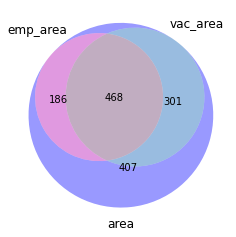

In [54]:
emp_area = set(df.loc[df['emp_reg'].notna(), 'emp_reg'])
vac_area = set(df_v['area_id'])
area = set(df['area_id'])


v = venn3([emp_area,vac_area, area], ('emp_area', 'vac_area', 'area'))
plt.show()

It seems that there are 407 redundant areas in the area table. 

2. Look at the areas with the biggest salary & number of vacancies

In [55]:
query_7_2 = f'''select
                    a.name area,
                    count(*) vac,
                    round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to, 0)),0) ave_salary
                from public.areas a
                left join public.vacancies v on a.id = v.area_id
                left join public.employers e on e.id = v.employer_id
                where 
                    salary_from is not null
                    or salary_to is not null
                group by 
                    a.name,
                    a.id
                order by 2 desc, 3 desc
                    '''
df = pd.read_sql_query(query_7_2, connection)
df.head(20)

,area,vac,ave_salary
0,Москва,1592,134140.0
1,Санкт-Петербург,1203,104410.0
2,Новосибирск,929,107777.0
3,Екатеринбург,901,91896.0
4,Краснодар,693,92328.0
5,Нижний Новгород,680,96059.0
6,Алматы,643,73171.0
7,Казань,628,92207.0
8,Ростов-на-Дону,612,94065.0
9,Минск,506,90426.0


The bigger the city, the bigger the average salary and the more vacancies it has.

3. Look at the most common industries

In [56]:
query_7_3 = f'''select
                    i.name,
                    count(distinct(e.id))
                from public.employers_industries ei
                full join public.industries i on ei.industry_id = i.id
                full join public.employers e on e.id=ei.employer_id
                group by i.name,
                    industry_id
                order by 2 desc
                    '''
emp_ind = pd.read_sql_query(query_7_3, connection)
emp_ind.name.fillna(value='none industry', inplace=True)
emp_ind.head(20)

,name,count
0,none industry,8419
1,Разработка программного обеспечения,3553
2,"Системная интеграция, автоматизации технологи...",2993
3,"Интернет-компания (поисковики, платежные систе...",1675
4,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
5,Консалтинговые услуги,662
6,Кадровые агентства,389
7,"Электронно-вычислительная, оптическая, контрол...",374
8,Розничная сеть (продуктовая),368
9,Интернет-магазин,351


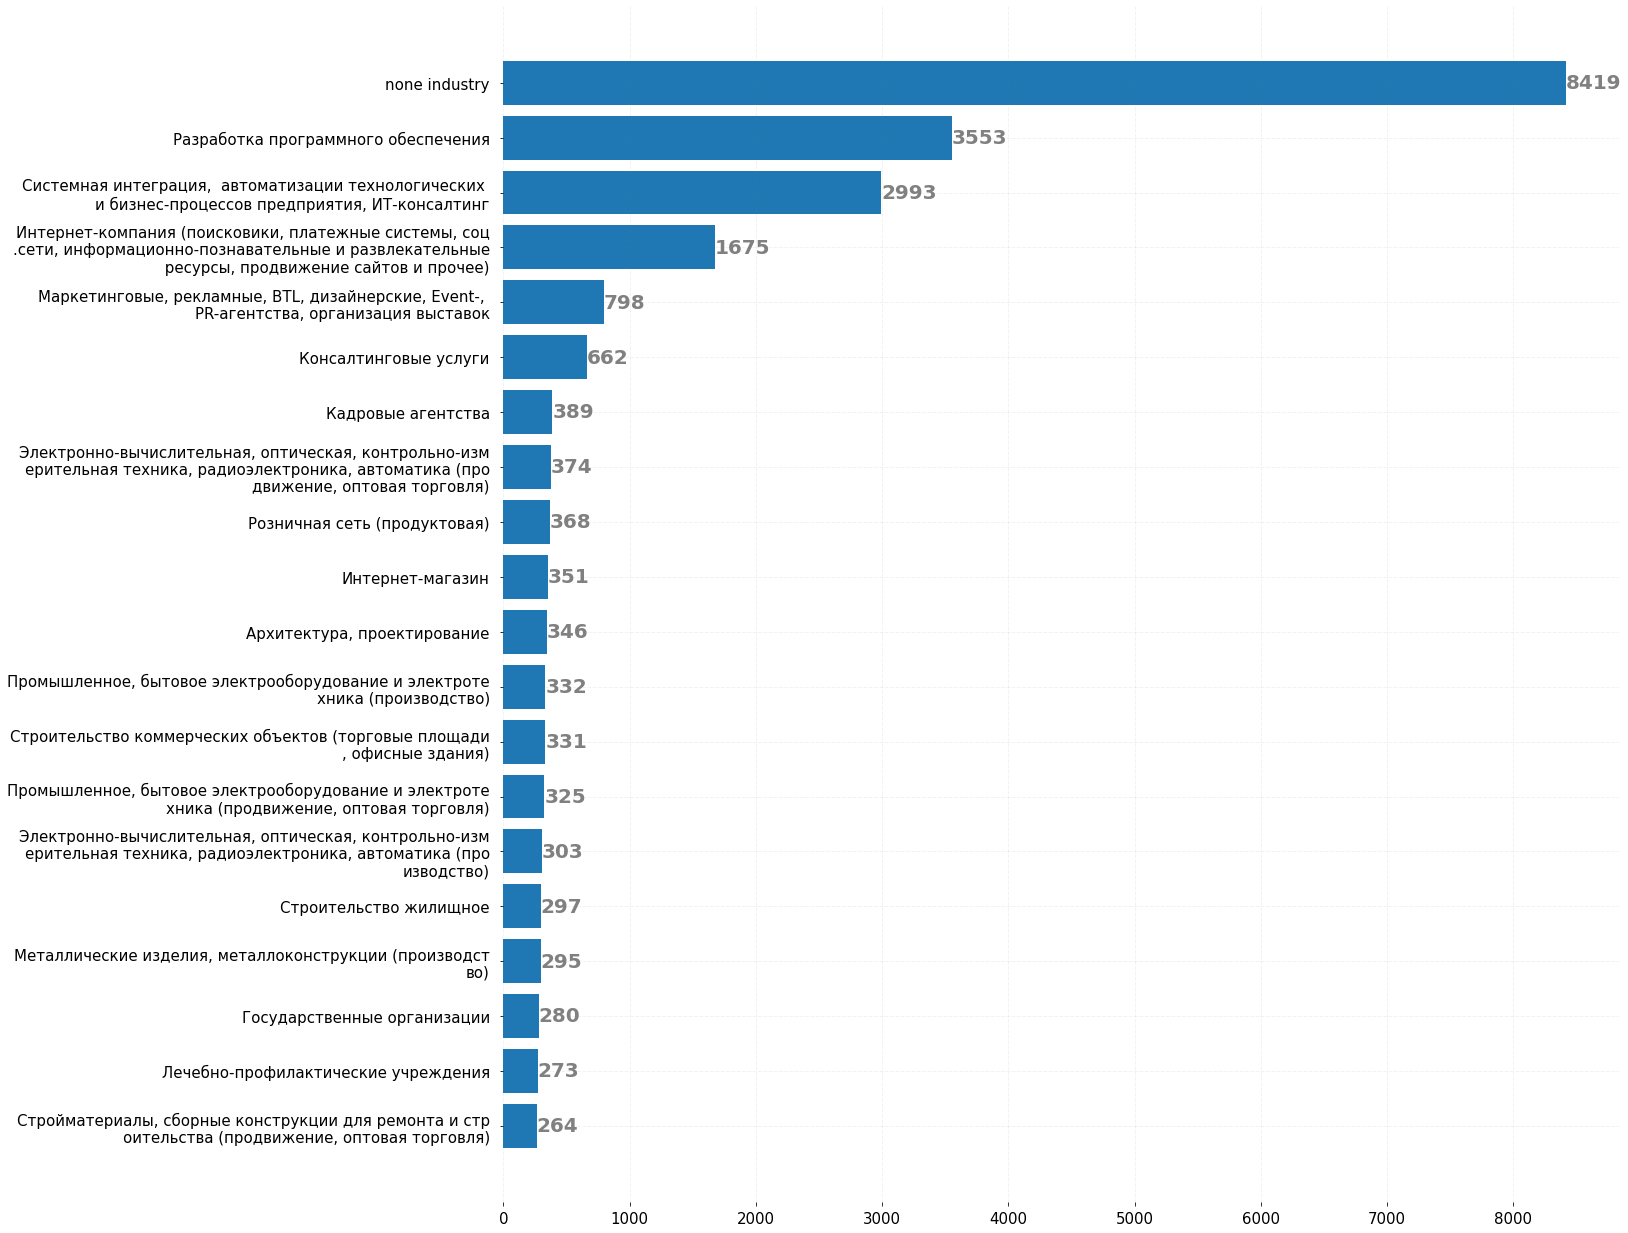

In [57]:
# barplot for most common industries
name = emp_ind['name'].head(20)
price = emp_ind['count'].head(20)

# prepare new ylabels
ylabels_new = [re.sub("(.{53})", "\\1\n", label, 0, re.DOTALL) for label in name]
 
# Figure Size
fig, ax = plt.subplots(figsize =(20,22))
 
# Horizontal Bar Plot
ax.barh(ylabels_new, price)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)


# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 20, fontweight ='bold',
             color ='grey')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Show Plot
plt.show()

The most popular employer industry is connected to the IT. It's because there is no binding to a specific place and relatively low equipment costs.

4. Look at the number of employers that don't have industry and vacancies

In [58]:
query_7_4 = f'''with temp(industry, employer, e_id, e_area)as
                (select
                    i.name industry,
                    e.name,
                    e.id,
                    e.area
                from public.employers_industries ei
                full join public.industries i on ei.industry_id = i.id
                full join public.employers e on e.id=ei.employer_id
                where 
                    i.name is null) 
                select 
                    count(*)
                from temp
                left join public.vacancies v on v.employer_id = e_id
                where v.id is null    
                    '''

In [59]:
df = pd.read_sql_query(query_7_4, connection)
df

,count
0,3460


Only 3460 companies that don't have industry dont have vacancies, so most of them have vacancies

5. Look at the dependency between number of areas of activity & number of vacancies

In [60]:
query_7_5 = f'''select
                    e.name,
                    count(distinct(i.name)) areas,
                    count(distinct(v.id)) vacancies
                from public.employers_industries ei
                left join public.industries i on ei.industry_id = i.id
                left join public.employers e on e.id=ei.employer_id
                left join public.vacancies v on v.employer_id=e.id
                group by e.name,
                    e.id
                having count(distinct(v.id))<>0
                order by 2 desc, 3 desc
                    '''

In [61]:
df = pd.read_sql_query(query_7_5, connection)
df

,name,areas,vacancies
0,Тинькофф,5,444
1,Северсталь,5,69
2,Калашников,5,63
3,ЕВРАЗ,5,62
4,"Beeline, ТМ",5,61
...,...,...,...
9942,Сеть магазинов Семья,1,1
9943,ComboAgency (ИП Барахоев Евгений Викторович),1,1
9944,ПО Муроммашзавод,1,1
9945,Baza.net,1,1


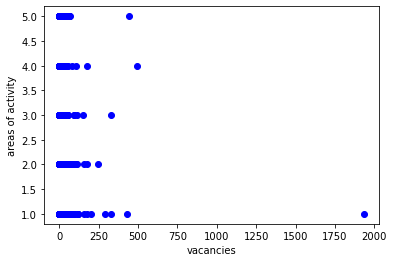

In [62]:
# look at the dependency on scatter plot
plt.scatter(df['vacancies'], df['areas'], c ="blue")

# add labels
plt.xlabel("vacancies")
plt.ylabel("areas of activity") 
# To show the plot
plt.show()

It seems that there is no dependency between employers' number of vacancies and their number of areas of activity.

6. Look at the dependency between the employer's number of vacancies & number of areas in vacancies

In [63]:
query_7_6 = f'''select
                    employer_id,
                    count(*) vacancies,
                    count(distinct(area_id)) vacancy_areas
                from public.vacancies
                group by
                    employer_id
                order by 2 desc, 3 desc
'''

In [64]:
df = pd.read_sql_query(query_7_6, connection)
df

,employer_id,vacancies,vacancy_areas
0,1740,1933,181
1,2748,491,152
2,78638,444,43
3,3529,428,24
4,39305,331,24
...,...,...,...
14901,667687,1,1
14902,1944521,1,1
14903,1946378,1,1
14904,1946657,1,1


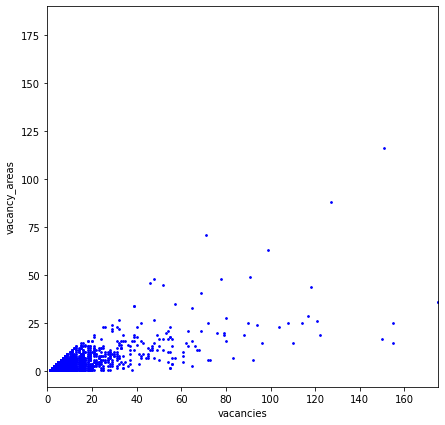

In [65]:
fig, ax = plt.subplots(figsize =(7, 7))

# look at the dependency on scatter plot
plt.scatter(df['vacancies'], df['vacancy_areas'], c ="blue", s=3)

# add labels 
plt.xlabel("vacancies")
plt.ylabel("vacancy_areas") 

# set axes range
plt.xlim(0, 175)

# To show the plot
plt.show()

1. It seems that there are 407 redundant areas in the area table. 
2. The bigger the city, the bigger the average salary and the more vacancies it has.
3. The most popular employer industry is connected to the IT. Maybe it's because there is no binding to a specific place and relatively low equipment costs.
4. Only 3460 companies that don't have industry dont have vacancies, so most of the companies without industry have vacancies.
5. It seems that there is no dependency between employers' number of vacancies and their number of areas of activity.
6. It seems that there is a dependency between the number of vacancies and number of areas in these vacancies per the employer.

**General conclusions:**
1. The most popular area of activity and vacancies are connected to the IT, these vacancies are common in different regions, probably because they are not tied to a particular field. The world is developing and there is more and more data to store and analyze so that's why data related vacancies take 3.6% of all vacancies which is quite a big percent.
2. The bigger the city, the bigger the average salary and the more vacancies it has. Maybe it's because the cost of living in a big city is higher.
3. Most employers want to find novice workers with at least 1 year experience and least employers want to find person with many years of experience maybe it's because employers need to pay more for the experience. 
4. Full employment & full day are the most common vacancy requirements.
5. The biggest employer is Yandex it has 1933 vacancies. Most companies that are at the top list by number of vacancies are telecommunications, banking and oil and gas companies. Also Yandex is most spread in different regions meanwhile almost 1/4d of all Yandex vacancies are in the cities-millionaires.
6. Half of the vacancies don't have any salary data this is probably due to the fact that employers don't want to share the salaries data in companies or in other places and also don't want to scare away the applicant with a too low salary. Also it is assumed that the employee himself will indicate his lower salary threshold, which he will then be paid and thus the company can save money.

It would be interesting to look at the vacancies difference between cities-millioneers and small areas. Also it would be interesting to compare the size of the company and the number of cities in which there are vacancies of that company.

In [66]:
connection.close()